In [1]:
import numpy as np
from math import sqrt
from numpy.random import seed
import seaborn as sns
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
result_dir = 'drive/My Drive/rpt_project/rpt_data/results/'

svr_20 = pd.read_csv(result_dir + 'svr_20.csv', index_col=0)
svr_50 = pd.read_csv(result_dir + 'svr_50.csv', index_col=0)
svr_100 = pd.read_csv(result_dir + 'svr_100.csv', index_col=0)
svr_1000 = pd.read_csv(result_dir + 'svr_1000.csv', index_col=0)

In [3]:
svr_20 = np.round(svr_20, 1)
svr_50 = np.round(svr_50, 1)
svr_100 = np.round(svr_100, 1)
svr_1000 = np.round(svr_1000, 1)

In [4]:
materials = ['A-A', 'A-AC', 'W-AC', 'G-AC', 'S-AC', 'A-SG', 'W-SG', 
             'G-SG', 'S-SG', 'A-S', 'W-S', 'G-S']

index_names = ['A-A', 'A-AC', 'A-SG', 'A-S', 'W-AC', 'W-SG', 'W-S', 'G-AC',
               'G-SG', 'G-S', 'S-AC', 'S-SG', 'LO', 'AI']

column_names = ['A-A', 'A-AC', 'A-SG', 'A-S', 'W-AC', 'W-SG', 'W-S', 'G-AC',
               'G-SG', 'G-S', 'S-AC', 'S-SG']

In [5]:
for df in [svr_20, svr_50, svr_100, svr_1000]:
    df.index = materials + ['LO', 'AI']
    df.columns = materials 

In [6]:
svr_20 = svr_20.reindex(index_names, columns=column_names)
svr_50 = svr_50.reindex(index_names, columns=column_names)
svr_100 = svr_100.reindex(index_names, columns=column_names)
svr_1000 = svr_1000.reindex(index_names, columns=column_names)

In [ ]:
print(np.mean(np.diagonal(svr_1000)))
print(np.mean(svr_1000.iloc[12]))
print(np.mean(svr_1000.iloc[13]))
print((np.sum(svr_1000.values) - np.sum(np.diagonal(svr_1000)) - np.sum(svr_1000.iloc[12]) - np.sum(svr_1000.iloc[13])) / 132)

0.5833333333333334
1.508333333333333
0.8916666666666666
29.446969696969695


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


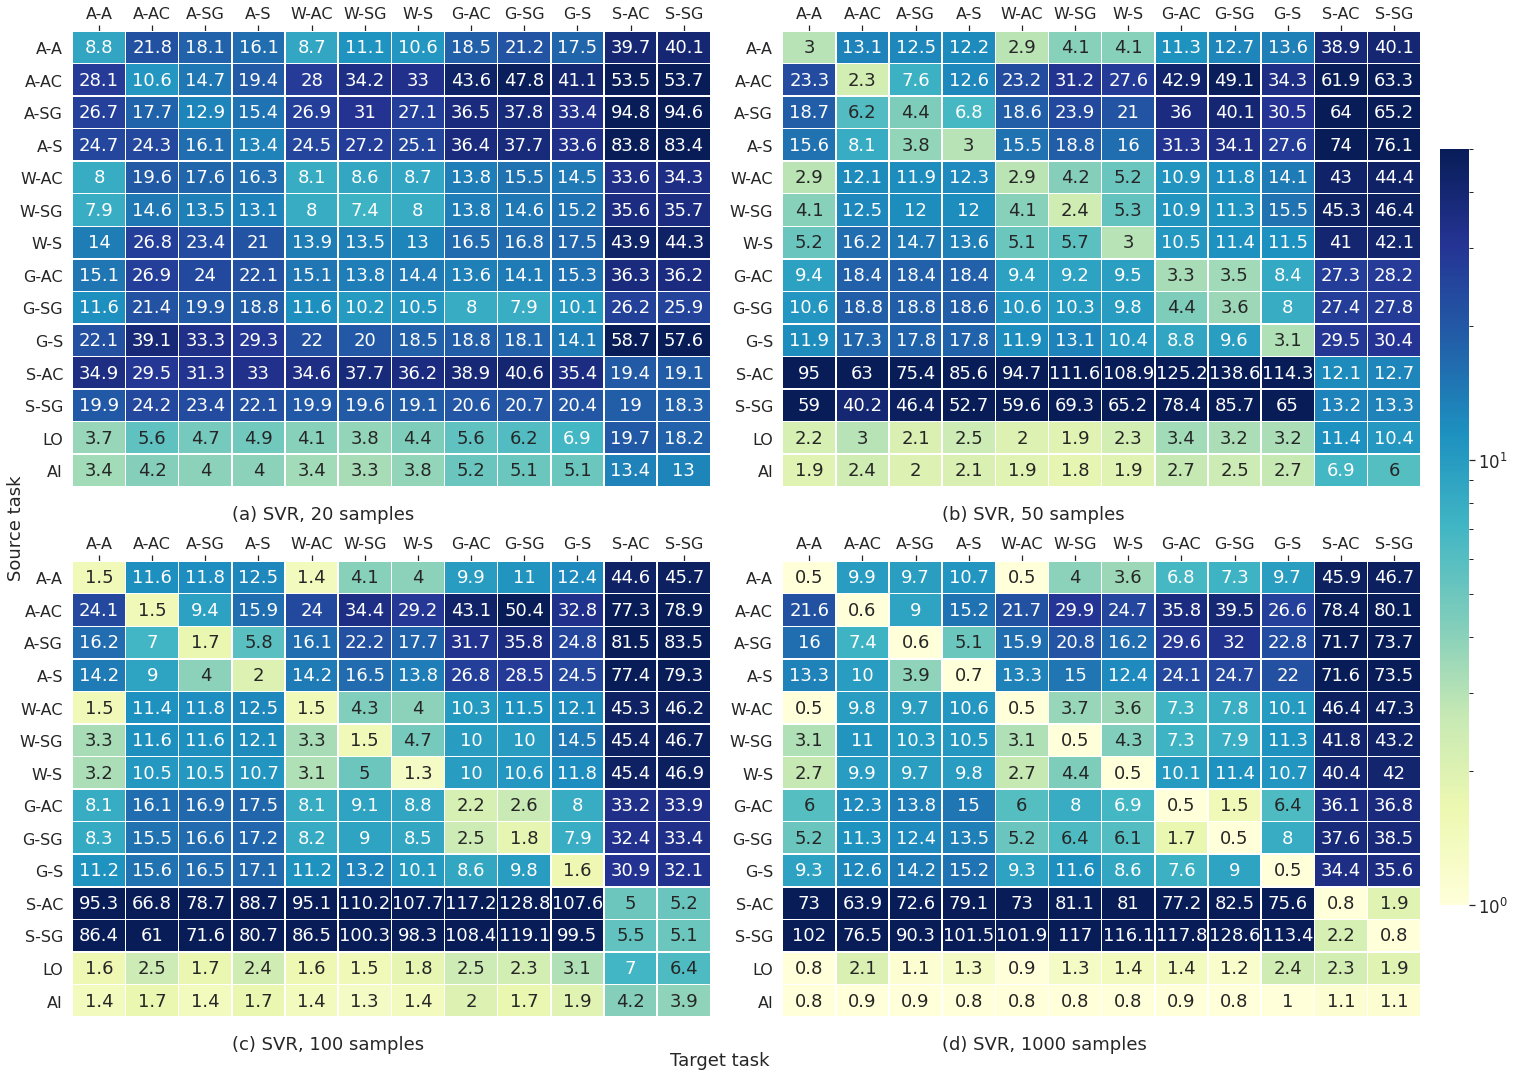

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
sns.set(font_scale=1.5)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
sns_plot_1 = sns.heatmap(svr_20, cmap='YlGnBu', annot=True, linewidths=0.5, 
                       norm=LogNorm(vmin=1, vmax=50), vmin=1, vmax=50, ax=ax1, cbar=False, fmt='g')
sns_plot_2 = sns.heatmap(svr_50, cmap='YlGnBu', annot=True, linewidths=0.5, 
                       norm=LogNorm(vmin=1, vmax=50), vmin=1, vmax=50, ax=ax2, cbar=False, fmt='g')
sns_plot_3 = sns.heatmap(svr_100, cmap='YlGnBu', annot=True, linewidths=0.5, 
                       norm=LogNorm(vmin=1, vmax=50), vmin=1, vmax=50, ax=ax3, cbar=False, fmt='g')
sns_plot_4 = sns.heatmap(svr_1000, cmap='YlGnBu', annot=True, linewidths=0.5, 
                       norm=LogNorm(vmin=1, vmax=50), vmin=1, vmax=50, ax=ax4, cbar_ax=cbar_ax, fmt='g')

sns_plot_1.set_yticklabels(labels=index_names, fontsize=16, rotation='horizontal')
sns_plot_1.set_xticklabels(labels=column_names, fontsize=16, rotation='horizontal')

sns_plot_2.set_yticklabels(labels=index_names, fontsize=16, rotation='horizontal')
sns_plot_2.set_xticklabels(labels=column_names, fontsize=16, rotation='horizontal')

sns_plot_3.set_yticklabels(labels=index_names, fontsize=16, rotation='horizontal')
sns_plot_3.set_xticklabels(labels=column_names, fontsize=16, rotation='horizontal')

sns_plot_4.set_yticklabels(labels=index_names, fontsize=16, rotation='horizontal')
sns_plot_4.set_xticklabels(labels=column_names, fontsize=16, rotation='horizontal')

sns_plot_1.xaxis.tick_top()
sns_plot_2.xaxis.tick_top()
sns_plot_3.xaxis.tick_top()
sns_plot_4.xaxis.tick_top()

ax1.text(3, 15, '(a) SVR, 20 samples')
ax2.text(3, 15, '(b) SVR, 50 samples')
ax3.text(3, 15, '(c) SVR, 100 samples')
ax4.text(3, 15, '(d) SVR, 1000 samples')

fig.text(0.5, 0.002, 'Target task', ha='center')
fig.text(0.005, 0.5, 'Source task', va='center', rotation='vertical')

fig.tight_layout()
fig.savefig("all_heatmaps.png", bbox_inches = "tight", dpi=300)

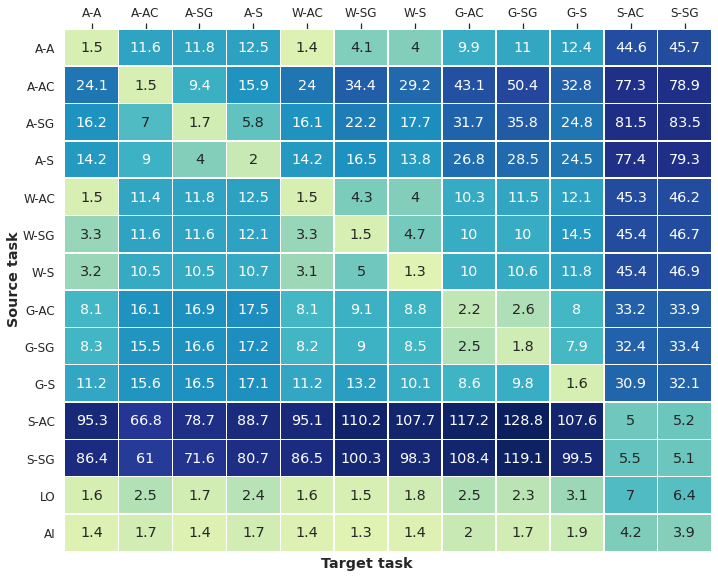

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
#cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
m = np.min([np.min(svr_20.values), np.min(svr_50.values), np.min(svr_100.values), np.min(svr_1000.values)])
n = np.max([np.max(svr_20.values), np.max(svr_50.values), np.max(svr_100.values), np.max(svr_1000.values)])

sns_plot = sns.heatmap(svr_100, cmap='YlGnBu', annot=True, linewidths=0.5, 
                       norm=LogNorm(vmin=m, vmax=n), 
                       vmin=m, vmax=n, ax=ax, cbar=False, fmt='g')

sns_plot.set_yticklabels(labels=index_names, fontsize=12, rotation='horizontal')
sns_plot.set_xticklabels(labels=column_names, fontsize=12, rotation='horizontal')

sns_plot.xaxis.tick_top()

fig.text(0.5, 0.0001, 'Target task', ha='center', weight='bold')
fig.text(0.0001, 0.5, 'Source task', va='center', rotation='vertical', weight='bold')


fig.tight_layout()

fig.savefig("svr_100_heatmap.pdf", bbox_inches = "tight", dpi=300)

In [ ]:
group_tasks = [[4, 8],
               [0, 2],
               [9, 10, 11],
               [0, 1, 5, 9],
               [2, 6, 10],
               [3, 7, 11],
               [1, 2, 3, 4],
               [5, 6, 7, 8], 
               [0, 2, 6, 10],
               [1, 5, 9]]

In [ ]:
result_dir = 'drive/My Drive/rpt_project/rpt_data/results/'
pt_100 = pd.read_csv(result_dir + 'svr_100.csv', index_col=0)
pt_1000 = pd.read_csv(result_dir + 'svr_1000.csv', index_col=0)

In [ ]:
with open(result_dir + 'lg_100.npy', 'rb') as f:
    lg_100 = np.load(f)

with open(result_dir + 'lg_1000.npy', 'rb') as f:
    lg_1000 = np.load(f)

with open(result_dir + 'igo_100.npy', 'rb') as f:
    igo_100 = np.load(f)

with open(result_dir + 'igo_1000.npy', 'rb') as f:
    igo_1000 = np.load(f)

In [ ]:
lg_100

array([24.31686939, 24.94588013,  1.90350946,  1.89636557,  2.25018676,
        2.13217063,  3.66263048,  1.76265829,  5.32076504,  4.24960949,
        4.16139682,  1.76656067,  1.67616077,  1.87214467,  4.08435975,
        4.29848687,  3.42396039,  2.49083446,  1.67122918,  2.57499277,
        7.10825872,  1.66747366,  1.71974783,  2.66517691,  6.31622073,
        3.00749323,  2.97312688,  2.43086226,  2.24093244,  6.99007046,
        5.32450587,  4.71437617])

In [ ]:
bl_100 = pt_100[:12].values.diagonal()
bl_1000 = pt_1000[:12].values.diagonal()
lo_100 = pt_100[12:13].values[0]
lo_1000 = pt_1000[12:13].values[0]

In [ ]:
bl_100

array([1.45492512, 1.50771892, 1.49427846, 2.24953034, 4.9762073 ,
       1.73875222, 1.51851689, 1.79704642, 5.14505778, 1.96279921,
       1.32808495, 1.55648777])

In [ ]:
lo_100

array([1.61583134, 2.53419236, 1.60494852, 2.54150346, 6.98402236,
       1.66561759, 1.53595198, 2.33531732, 6.4277386 , 2.36108315,
       1.77650723, 3.11525807])

In [ ]:
group_names = []
bl_row_100, bl_row_1000 = [], []
lo_row_100, lo_row_1000 = [], []
             
for group in group_tasks:
    for task in group:
        name = materials[task]
        group_names.append(name)
        bl_row_100.append(bl_100[task])
        bl_row_1000.append(bl_1000[task])
        lo_row_100.append(lo_100[task])
        lo_row_1000.append(lo_1000[task])

In [ ]:
df_gs_100 = pd.DataFrame()
df_gs_100 = df_gs_100.append([bl_row_100])
df_gs_100 = df_gs_100.append([lo_row_100], ignore_index=True)
df_gs_100 = df_gs_100.append([lg_100], ignore_index=True)
df_gs_100 = df_gs_100.append([igo_100], ignore_index=True)
df_gs_100.columns = group_names

In [ ]:
df_gs_1000 = pd.DataFrame()
df_gs_1000 = df_gs_1000.append([bl_row_1000], ignore_index=True)
df_gs_1000 = df_gs_1000.append([lo_row_1000], ignore_index=True)
df_gs_1000 = df_gs_1000.append([lg_1000], ignore_index=True)
df_gs_1000 = df_gs_1000.append([igo_1000], ignore_index=True)
df_gs_1000.columns = group_names

In [ ]:
df_gs_100

,S-AC,S-SG,A-A,W-AC,A-S,W-S,G-S,A-A,A-AC,A-SG,A-S,W-AC,W-SG,W-S,G-AC,G-SG,G-S,A-AC,W-AC,G-AC,S-AC,A-SG,W-SG,G-SG,S-SG,A-A,W-AC,W-SG,W-S,A-AC,A-SG,A-S
0,4.976207,5.145058,1.454925,1.494278,1.962799,1.328085,1.556488,1.454925,1.507719,1.738752,1.962799,1.494278,1.518517,1.328085,2.249530,1.797046,1.556488,1.507719,1.494278,2.249530,4.976207,1.738752,1.518517,1.797046,5.145058,1.454925,1.494278,1.518517,1.328085,1.507719,1.738752,1.962799
1,6.984022,6.427739,1.615831,1.604949,2.361083,1.776507,3.115258,1.615831,2.534192,1.665618,2.361083,1.604949,1.535952,1.776507,2.541503,2.335317,3.115258,2.534192,1.604949,2.541503,6.984022,1.665618,1.535952,2.335317,6.427739,1.615831,1.604949,1.535952,1.776507,2.534192,1.665618,2.361083
2,24.316869,24.945880,1.903509,1.896366,2.250187,2.132171,3.662630,1.762658,5.320765,4.249609,4.161397,1.766561,1.676161,1.872145,4.084360,4.298487,3.423960,2.490834,1.671229,2.574993,7.108259,1.667474,1.719748,2.665177,6.316221,3.007493,2.973127,2.430862,2.240932,6.990070,5.324506,4.714376
3,5.144860,4.762065,1.320326,1.381568,7.250385,4.908528,10.952538,15.793786,3.556316,2.459552,2.566879,3.170331,3.960581,4.868696,3.304825,3.247488,7.486773,10.823337,5.780584,10.781643,35.852821,10.906574,5.026810,10.385521,39.001348,1.661568,1.597899,3.601784,4.679711,4.341365,2.232814,3.588878


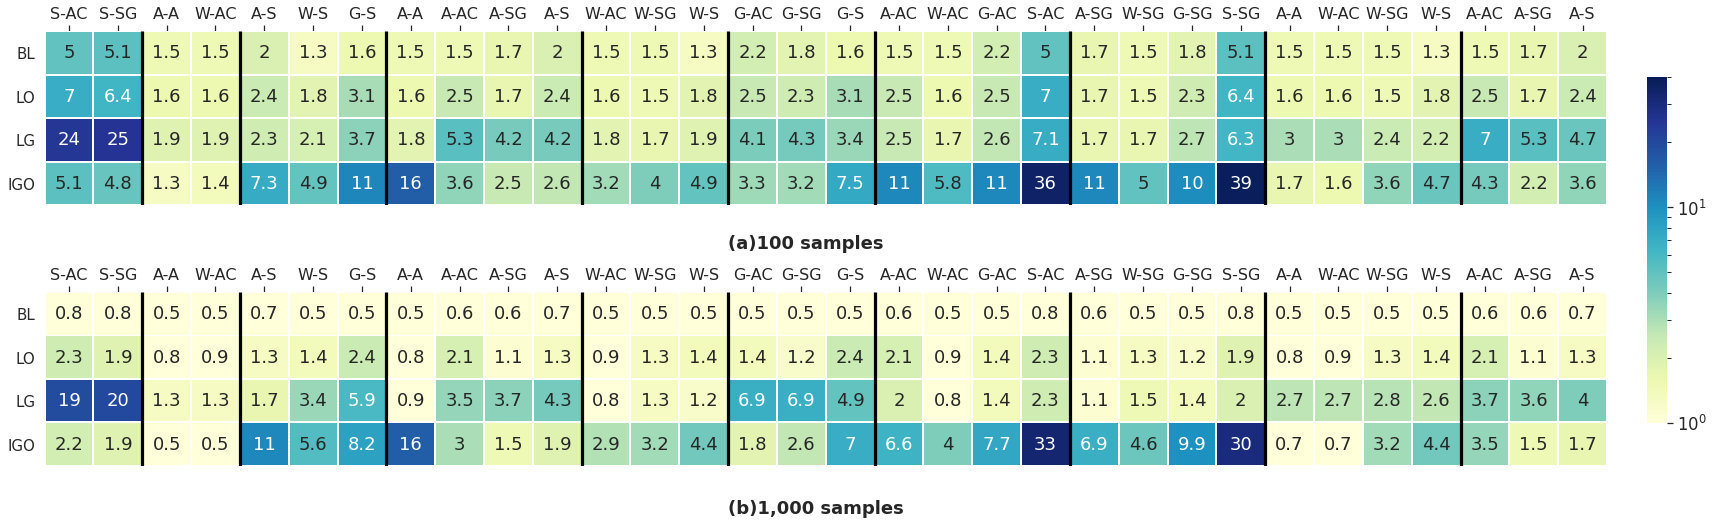

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(28, 8))

sns.set(font_scale=1.5)

sns_plot_1 = sns.heatmap(df_gs_100.round(1), cmap='YlGnBu', annot=True, linewidths=1, linecolor='white',
                       norm=LogNorm(vmin=1, vmax=40), vmin=1, vmax=40, ax=axes[0], cbar=False)

sns_plot_1.xaxis.set_label_position('top') 
sns_plot_1.xaxis.tick_top()

sns_plot_1.set_xticklabels(labels=group_names, fontsize=16, rotation='horizontal')
sns_plot_1.set_yticklabels(labels=['BL', 'LO', 'LG', 'IGO'], fontsize=15, rotation='horizontal')


sns_plot_1.vlines([2, 4, 7, 11, 14, 17, 21, 25, 29], *sns_plot_1.get_xlim(), 
                  colors='black', linewidths=3.2)
# sns_plot_1.hlines([4], *sns_plot_1.get_xlim(), colors='black', linewidths=3.2)


# fig.text(0.5, 0.001, 'Groups', va='center', rotation='horizontal')

# ax.text(10.0, 8.0, 'Leave-group-out SVR')

# fig.tight_layout()


cbar_ax = fig.add_axes([0.92, .2, .01, .6])

sns_plot_2 = sns.heatmap(df_gs_1000.round(1), cmap='YlGnBu', annot=True, linewidths=1, linecolor='white',
                       norm=LogNorm(vmin=1, vmax=40), vmin=1, vmax=40, ax=axes[1], 
                       cbar_ax=cbar_ax)

sns_plot_2.xaxis.set_label_position('top') 
sns_plot_2.xaxis.tick_top()


sns_plot_2.set_xticklabels(labels=group_names, fontsize=16, rotation='horizontal')
sns_plot_2.set_yticklabels(labels=['BL', 'LO', 'LG', 'IGO'], fontsize=15, rotation='horizontal')


sns_plot_2.vlines([2, 4, 7, 11, 14, 17, 21, 25, 29], *sns_plot_2.get_xlim(), 
                  colors='black', linewidths=3.2)


axes[0].text(14, 5, '(a)100 samples', weight='bold')
axes[1].text(14, 5.1, '(b)1,000 samples', weight='bold')
plt.subplots_adjust(hspace=0.5)

fig.savefig("svr_group_heatmaps.pdf", bbox_inches = "tight")

plt.show()

In [ ]:
with open('lo_fine_tune.npy', 'rb') as f:
    pt_fine_tune = np.load(f)

with open('lo_fine_tune_2.npy', 'rb') as f:
    pt_fine_tune_2 = np.load(f)

In [ ]:
avg = (pt_fine_tune + pt_fine_tune_2) / 2

In [ ]:
num_new_points = [0, 1, 2, 5, 10, 20, 40, 50, 75, 100]
materials = ['A-A', 'A-AC', 'W-AC', 'G-AC', 'S-AC', 'A-SG', 'W-SG', 
             'G-SG', 'S-SG', 'A-S', 'W-S', 'G-S']
dict_1 = {'A': 'red', 'W': 'blue', 'G': 'green', 'S': 'black'}
dict_2 = {'A': 'dashed', 'AC': 'solid', 'SG': 'dotted', 'S': 'dashdot'}

In [ ]:
target_tasks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
source_tasks = 0
dup = [0, 1, 2, 3, 4, 5, 10]

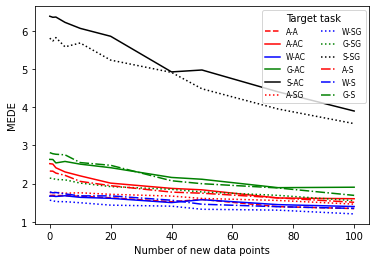

In [ ]:
for t in range(12):
    #t = source_tasks[i]
    label = materials[t]
    media = label.split('-')[0]
    wall = label.split('-')[1]
    plt.plot(num_new_points, avg[t], label=label, color=dict_1[media], linestyle=dict_2[wall])
plt.xlabel('Number of new data points')
plt.ylabel('MEDE')

plt.legend(title='Target task', loc='upper right', fontsize=7.5, ncol=2)
plt.savefig('lo_fine_tune.pdf', dpi=300)
plt.show()

In [ ]:
with open('pt_fine_tune.npy', 'rb') as f:
    pt_fine_tune = np.load(f)

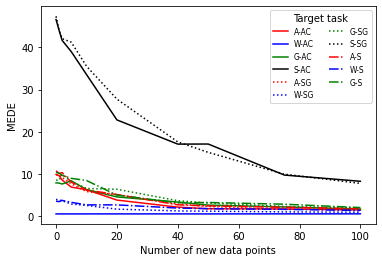

In [ ]:
for i in range(11):
    t = target_tasks[i]
    label = materials[t]
    media = label.split('-')[0]
    wall = label.split('-')[1]
    plt.plot(num_new_points, pt_fine_tune[i], label=label, color=dict_1[media], linestyle=dict_2[wall])
plt.xlabel('Number of new data points')
plt.ylabel('MEDE')

plt.legend(title='Target task', loc='upper right', fontsize=7.5, ncol=2)
plt.savefig('pt_fine_tune.pdf', dpi=300)
plt.show()

In [ ]:
with open('copy_fine_tune.npy', 'rb') as f:
    copy_fine_tune = np.load(f)

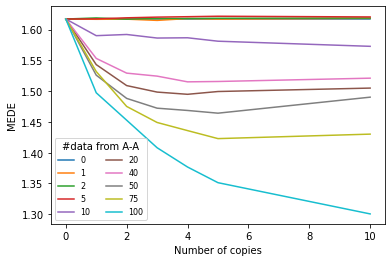

In [ ]:
for i in range(len(num_new_points)):
    #print([start_point] + list(result[i]))
    plt.plot(dup, copy_fine_tune[i], label=num_new_points[i])
plt.xlabel('Number of copies')
plt.ylabel('MEDE')
# plt.xscale('log')
# plt.title('Test MEDE Loss vs. copies')
plt.legend(title='#data from A-A', loc='lower left', ncol=2, fontsize=8)
plt.savefig('copy_fine_tune.pdf', dpi=300)
plt.show()